In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [348]:
dashboard = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/dashboard.csv').sort_values(by='Unnamed: 0')
specs = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/specs.csv').sort_values(by='Unnamed: 0').iloc[: , 5:]
bbe = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/bbe.csv').sort_values(by='Unnamed: 0').iloc[: , 4:]
xstats = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/xstats.csv').sort_values(by='Unnamed: 0').iloc[: , 5:]
discipline = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/discipline.csv').sort_values(by='Unnamed: 0').iloc[: , 5:]
ooz = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/ooz.csv').rename(columns={"Contact": "O-Contact","Swing":"O-Swing"}).sort_values(by='Unnamed: 0').reindex(columns=['Unnamed: 0','Unnamed: 2','O-Contact','O-Swing']).iloc[: , 2:]
iz = pd.read_csv('/Users/joerendon/Desktop/pitchseparationarticle/iz.csv').rename(columns={"Contact": "Z-Contact","Swing":"Z-Swing"}).sort_values(by='Unnamed: 0').reindex(columns=['Unnamed: 0','Unnamed: 2','Z-Contact','Z-Swing']).iloc[: , 2:]

In [349]:
bigboi = pd.concat([dashboard,specs,bbe,xstats,discipline,ooz,iz], axis=1).replace('%','', regex=True).replace(',','', regex=True).replace('°','', regex=True).drop(columns=['Unnamed: 1','Unnamed: 2','Unnamed: 3','Starts']).rename(columns={"Unnamed: 0": "Pitcher"})
bigboi[['Pitcher','PitchType']] = bigboi['Pitcher'].str.split('\'s',expand=True)
display(bigboi)

,Pitcher,Pitches,TBF (PA),Usage%,2-Strk%,K%,uBB%,K–BB%,HR,AVG,...,Putaway,Heart,Shadow,Chase,Waste,O-Contact,O-Swing,Z-Contact,Z-Swing,PitchType
2925,Abbott Cory,2,0,4.2,2.9,NaN,NaN,NaN,0,NaN,...,0.0,0.0,50.0,50.0,0.0,71.4,85.7,100.0,100.0,CH
2068,Abbott Cory,40,8,17.2,24.3,25.0,0.0,25.0,0,0.500,...,12.5,27.5,30.0,20.0,22.5,13.0,21.7,52.9,64.7,CU
1337,Abbott Cory,118,33,57.0,45.7,12.1,18.2,-6.1,4,0.185,...,12.9,23.7,45.8,20.3,10.2,11.8,35.3,50.9,79.2,FF
1809,Abbott Cory,62,18,21.6,27.2,27.8,11.1,16.7,1,0.188,...,20.8,22.6,46.8,24.2,6.5,9.7,29.0,70.4,81.5,SL
1755,Abreu Albert,67,17,13.6,18.0,35.3,5.9,29.4,3,0.250,...,30.0,10.4,43.3,23.9,22.4,15.7,25.5,44.8,58.6,CH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,deGrom Jacob,54,17,32.6,38.4,76.5,0.0,76.5,0,0.118,...,48.1,11.1,27.8,50.0,11.1,23.5,33.7,69.6,73.9,SL
1487,Álvarez José,96,32,26.1,29.8,28.1,6.3,21.9,2,0.207,...,29.0,11.5,36.5,33.3,18.8,20.0,20.0,46.5,53.5,CH
2600,Álvarez José,11,2,11.9,14.2,50.0,0.0,50.0,0,0.500,...,20.0,9.1,45.5,27.3,18.2,16.7,25.9,60.0,80.0,FF
1196,Álvarez José,139,36,43.0,36.9,8.3,16.7,-8.3,1,0.286,...,10.3,20.9,44.6,25.9,8.6,17.6,29.4,57.8,57.8,SI


In [350]:
bigboi['Pitches'] = bigboi['Pitches'].astype(float) 
bigboi = bigboi.query('Pitches > 50')

In [351]:
bigboi.to_csv('/Users/joerendon/Desktop/pitchseparationarticle/bigboi.csv')

In [353]:
# list of every pitcher
pitcherlist = list(bigboi['Pitcher'].unique())
# empty df
new_df = pd.DataFrame({
                    'Pitcher':[], 
                    'Primary':[], 
                    'Secondary':[],
                    'H-Mov Diff':[],
                    'V-Mov Diff':[], 
                    'MPH Diff':[], 
                    'RPM Diff':[],
                    'VAA Diff':[],
                    'HAA Diff':[],
                    'Spin Degree Diff':[],
                    'Usage Rate':[],
                    'Chase Rate':[],
                    'Zone Whiff Rate':[],
                    'Called Strike Rate':[],
                    'wOBAcon':[]
                    } )
bigboi[' H-Mov'] = bigboi[' H-Mov'].astype(float).abs()
bigboi['HAA'] = bigboi['HAA'].astype(float).abs()

In [354]:
for i in range(len(pitcherlist)):

    pitcher_name = pitcherlist[i]
    # get pitcher
    ask = bigboi.query(f'Pitcher == "{pitcher_name}"').sort_values(by='Usage%',ascending=False)

    # get primary pitch
    primary = ask.head(1)
    primarytype = primary['PitchType'].values

    # loop through secondaries and get movement difference
    secondaries = ask.query(f'PitchType != {primarytype}')

    for secondaryitem in range(len(secondaries)):
        new_df.loc[len(new_df.index)] = [
                pitcher_name, # Pitcher
                primary['PitchType'].values[0], # Primary
                secondaries.iloc[secondaryitem]['PitchType'], # Secondary
                (primary[' H-Mov'] - secondaries.iloc[secondaryitem][' H-Mov']).values[0],
                (primary[' V-Mov'] - secondaries.iloc[secondaryitem][' V-Mov']).values[0],
                (primary['MPH'] - secondaries.iloc[secondaryitem]['MPH']).values[0], # Velo diff
                (primary['RPM'].astype(float) - float(secondaries.iloc[secondaryitem]['RPM'])).values[0], # Spin diff
                (primary['VAA'].astype(float) - float(secondaries.iloc[secondaryitem]['VAA'])).values[0], # VertAprrAngle diff
                (primary['HAA'].astype(float) - float(secondaries.iloc[secondaryitem]['HAA'])).values[0], # HorzAprrAngle diff
                (primary['Spin Diff'].astype(float) - float(secondaries.iloc[secondaryitem]['Spin Diff'])).values[0], # Spin angle diff
                float(secondaries.iloc[secondaryitem]['Usage%']), # Usage Rate
                float(secondaries.iloc[secondaryitem]['O-Swing']), # Chase rate
                100 - float(secondaries.iloc[secondaryitem]['Z-Contact']), # Zone Whiff rate
                float(secondaries.iloc[secondaryitem]['CallStr']), #Called Str rate
                float(secondaries.iloc[secondaryitem]['wOBAcon']), # wobacon
                ]
    print(i,pitcherlist[i])

0 Abbott Cory
1 Abreu Albert
2 Abreu Bryan
3 Acevedo Domingo
4 Adam Jason
5 Adon Joan
6 Akin Keegan
7 Alcantara Sandy
8 Alexander Jason
9 Alexander Tyler
10 Allard Kolby
11 Allen Logan
12 Almonte Yency
13 Alvarado José
14 Anderson Ian
15 Anderson Tyler
16 Appel Mark
17 Arano Víctor
18 Archer Chris
19 Armstrong Shawn
20 Ashby Aaron
21 Ashcraft Graham
22 Baker Bryan
23 Banda Anthony
24 Banks Tanner
25 Bard Daniel
26 Bard Luke
27 Barlow Joe
28 Barlow Scott
29 Barnes Jacob
30 Barnes Matt
31 Barraclough Kyle
32 Barría Jaime
33 Bass Anthony
34 Bassitt Chris
35 Baumann Mike
36 Bautista Félix
37 Baz Shane
38 Bañuelos Manny
39 Beasley Jeremy
40 Bednar David
41 Beede Tyler
42 Beeks Jalen
43 Bellatti Andrew
44 Bello Brayan
45 Bender Anthony
46 Berríos José
47 Bickford Phil
48 Bieber Shane
49 Bielak Brandon
50 Bird Jake
51 Blach Ty
52 Blackburn Paul
53 Blanco Ronel
54 Bleier Richard
55 Bolaños Ronald
56 Borucki Ryan
57 Boxberger Brad
58 Bradish Kyle
59 Bradley Archie
60 Brash Matt
61 Brasier Ryan


In [366]:
new_df.to_csv('/Users/joerendon/Desktop/pitchseparationarticle/diffboi.csv')

In [368]:
unique_prim = list(new_df['Primary'].unique())
unique_second = list(new_df['Secondary'].unique())

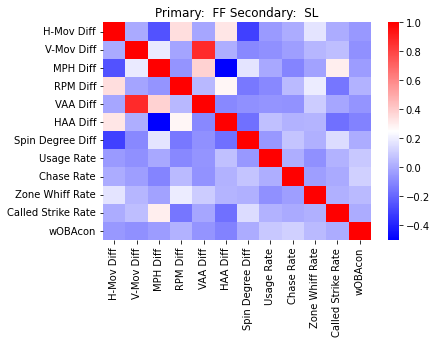

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


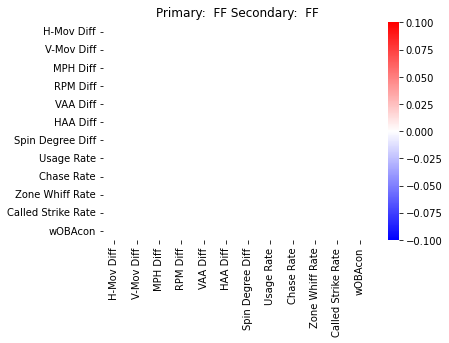

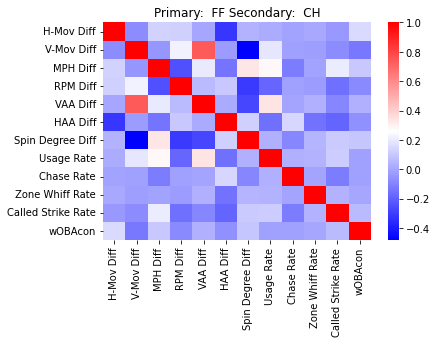

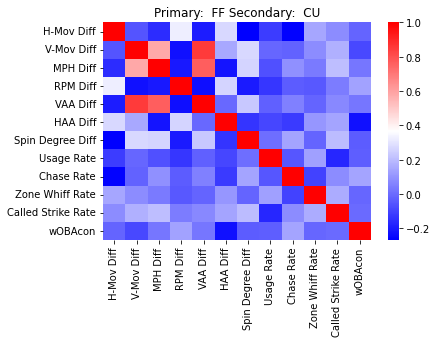

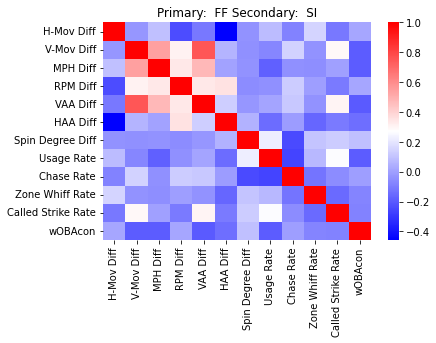

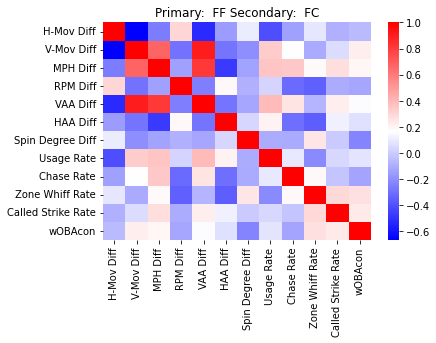

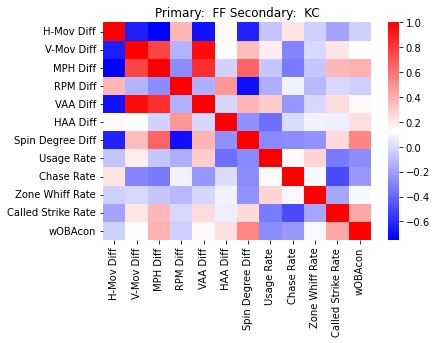

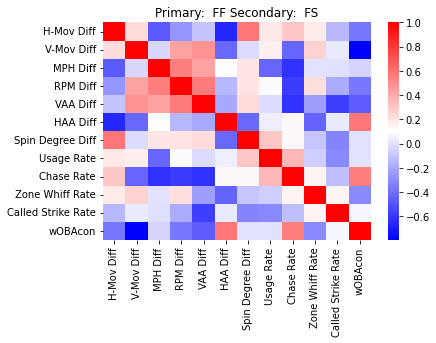

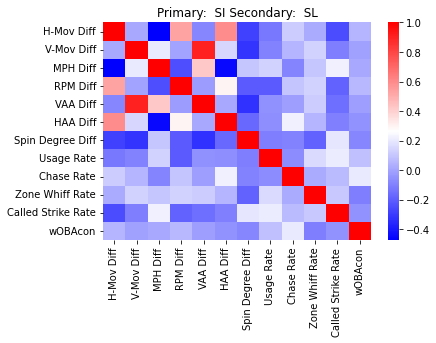

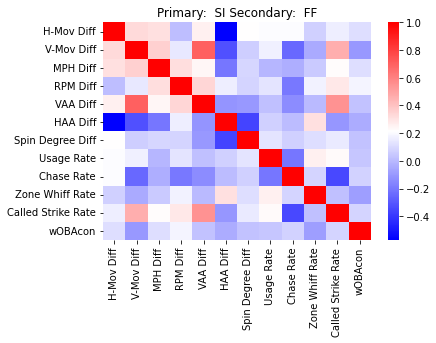

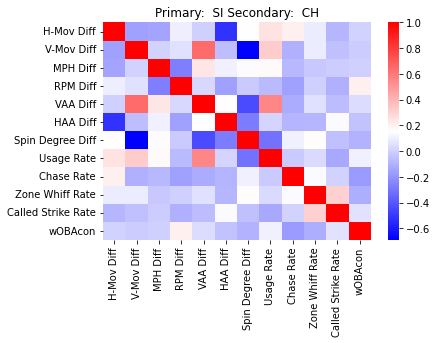

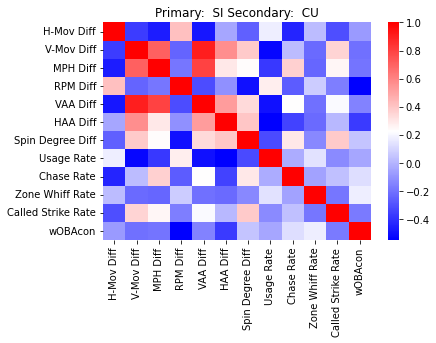

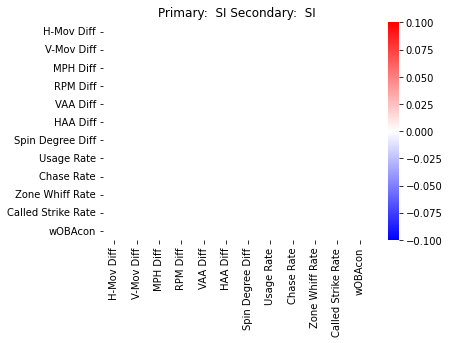

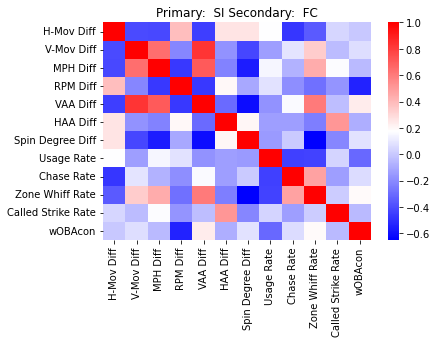

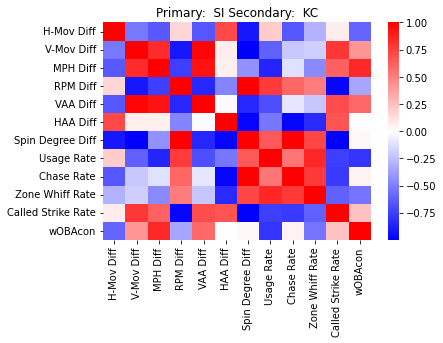

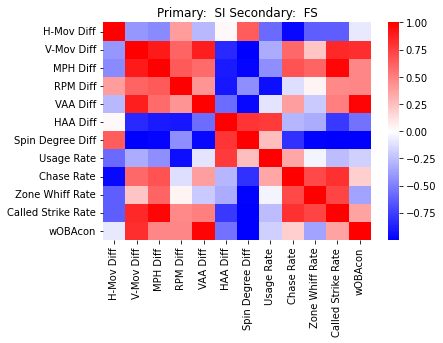

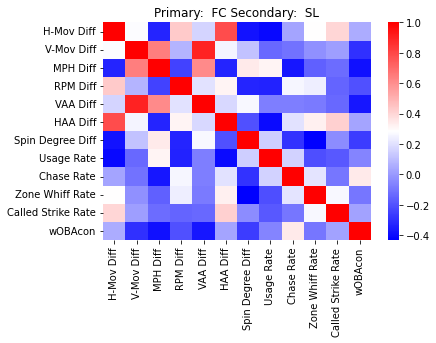

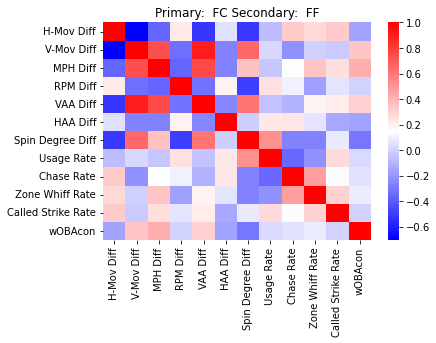

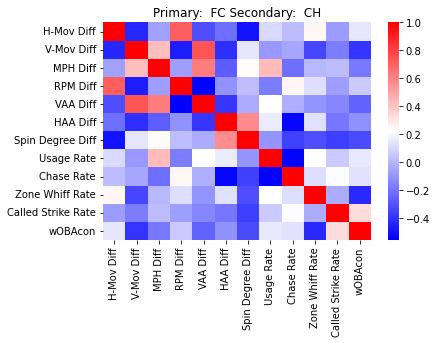

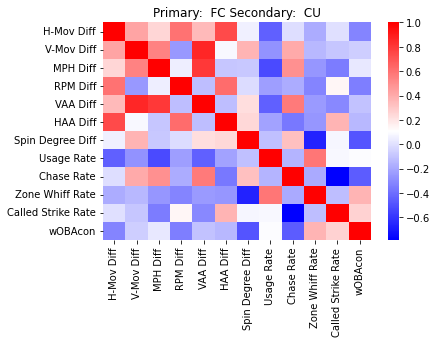

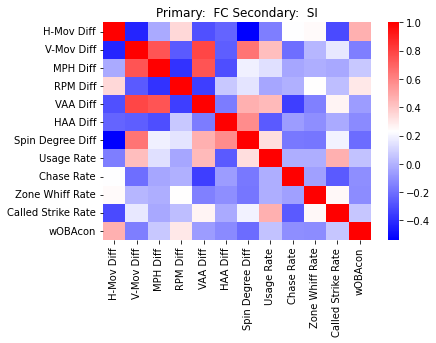

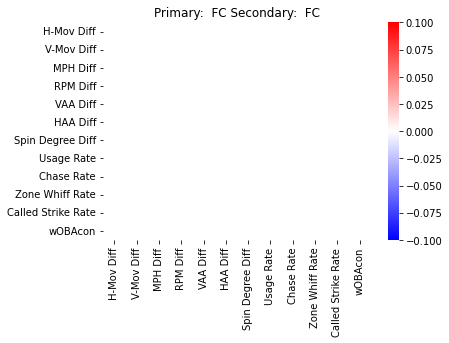

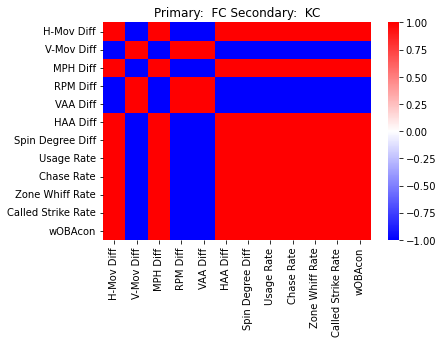

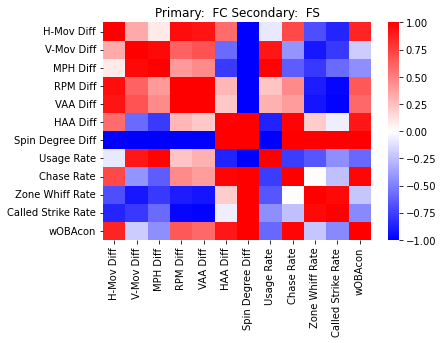

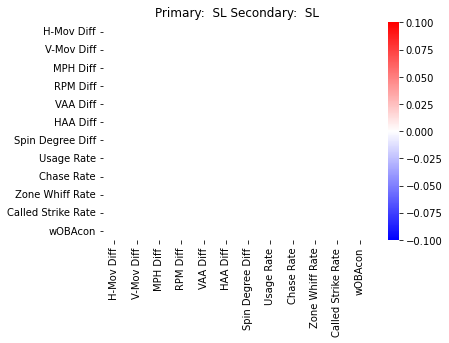

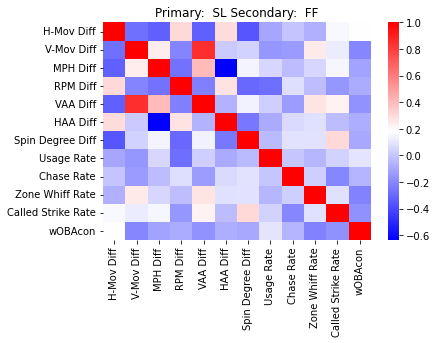

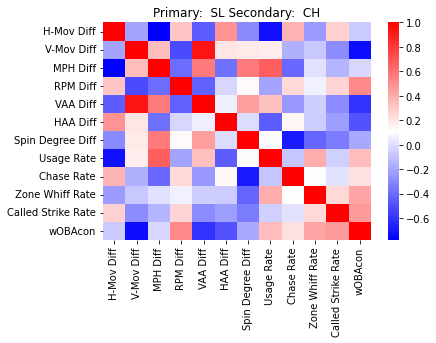

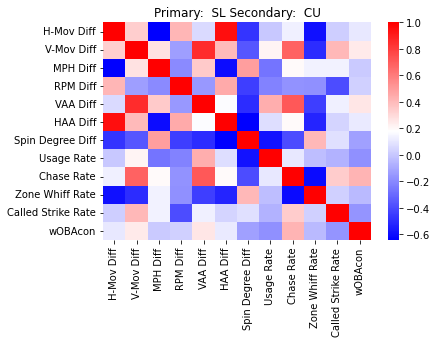

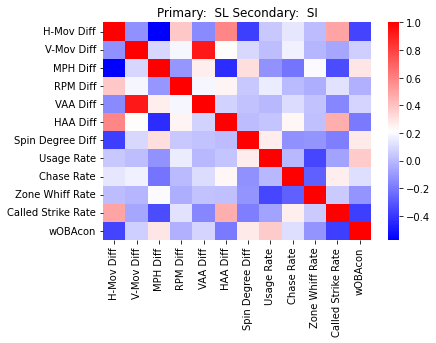

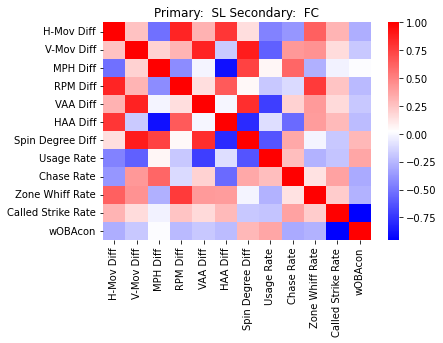

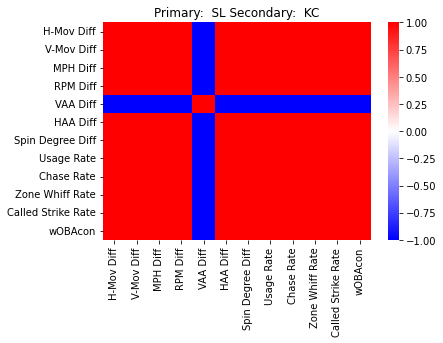

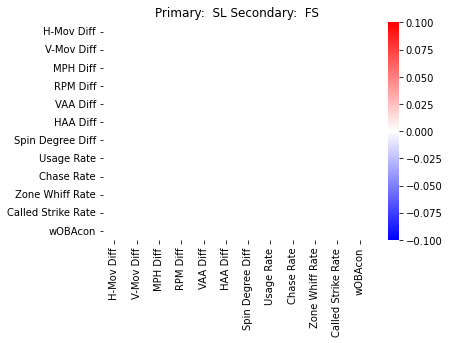

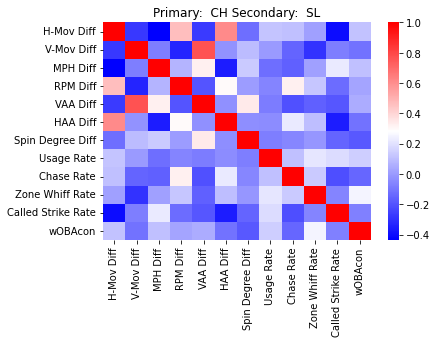

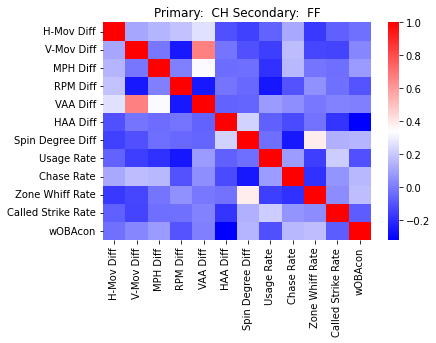

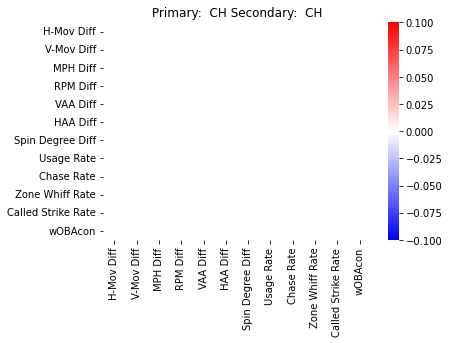

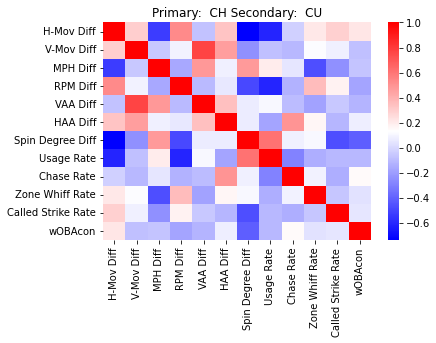

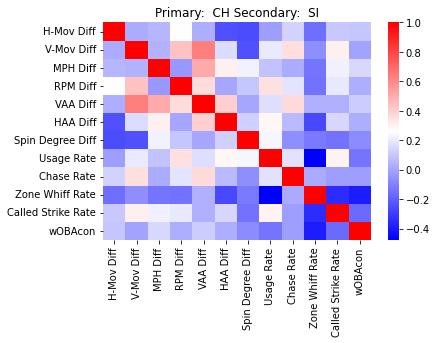

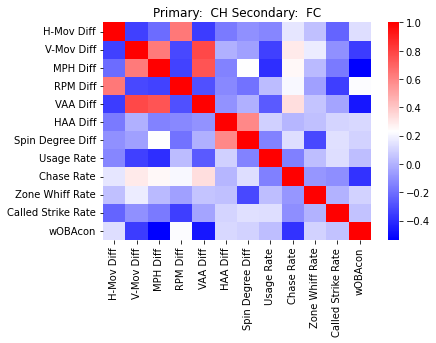

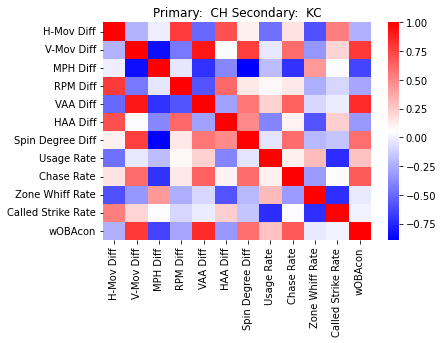

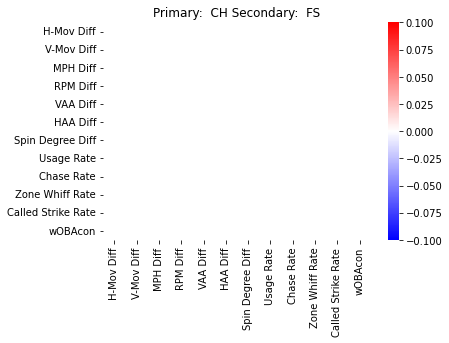

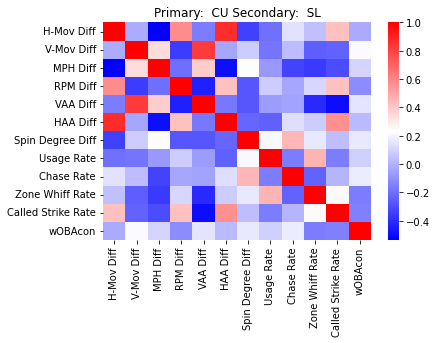

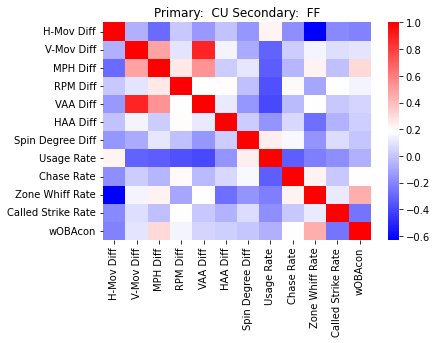

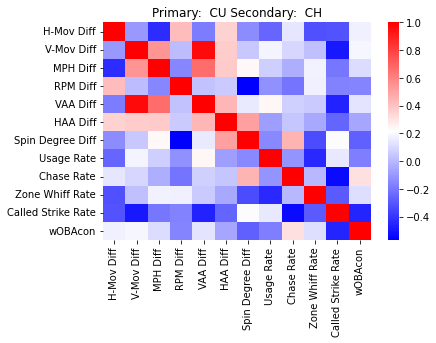

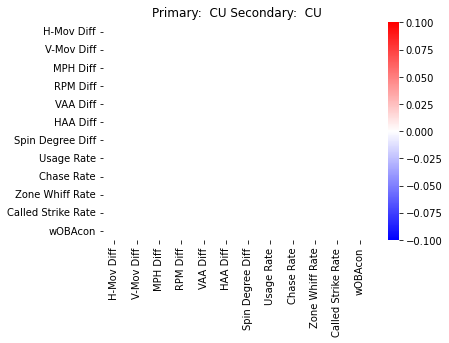

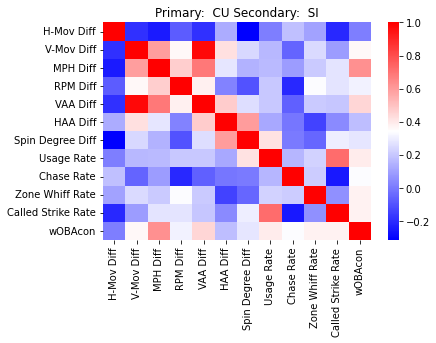

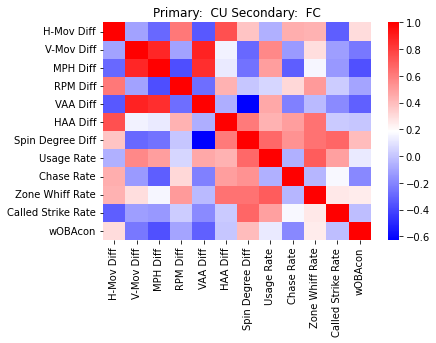

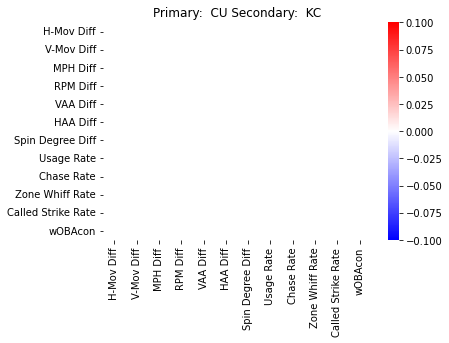

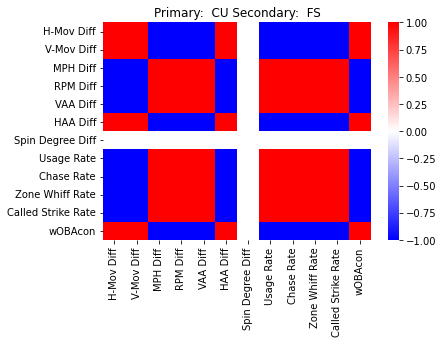

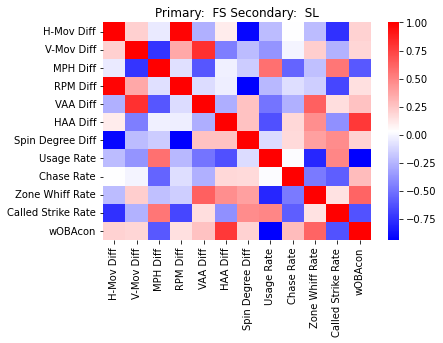

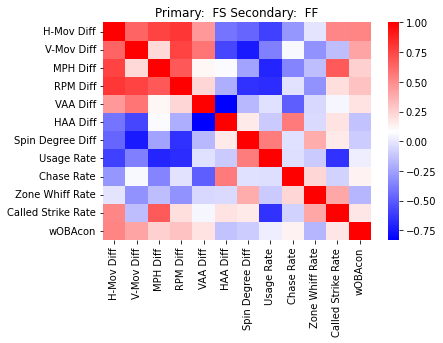

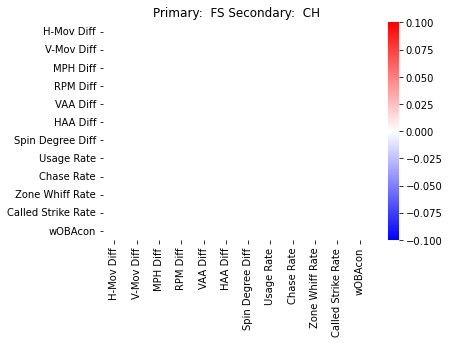

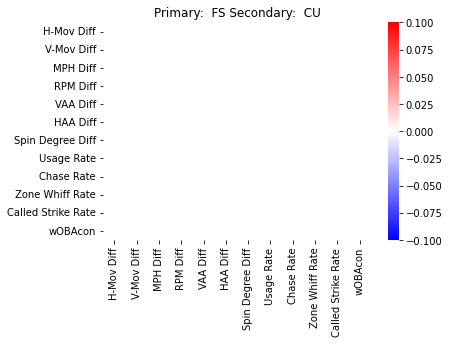

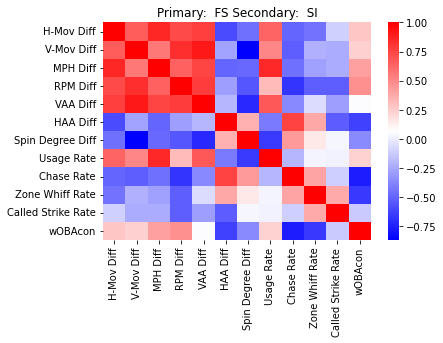

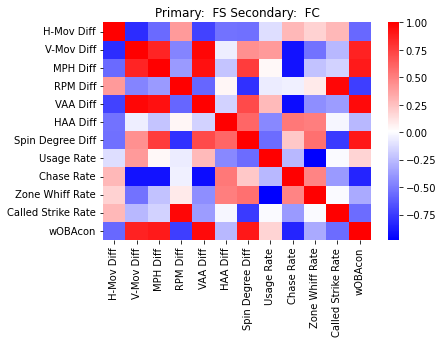

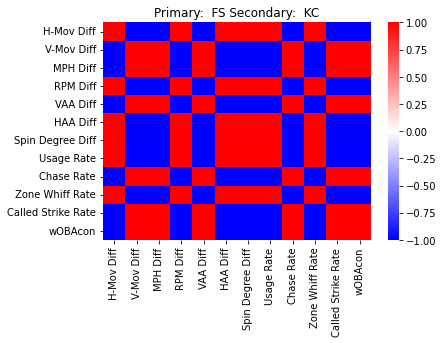

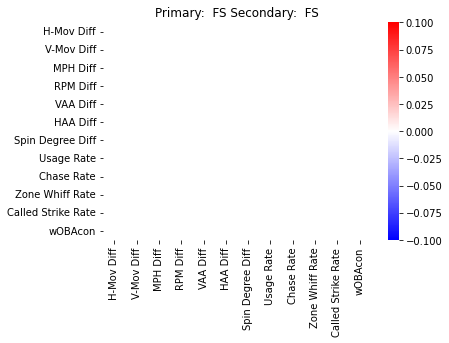

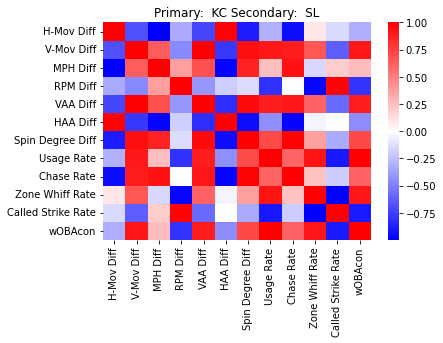

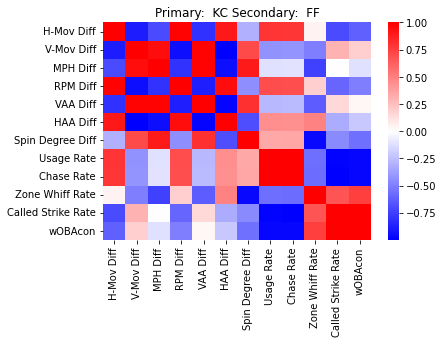

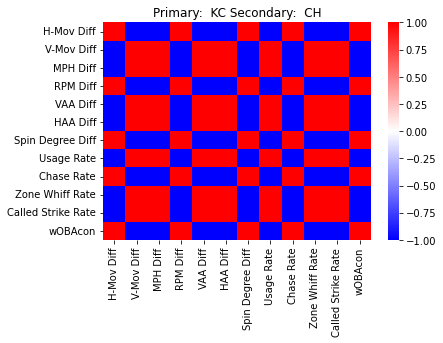

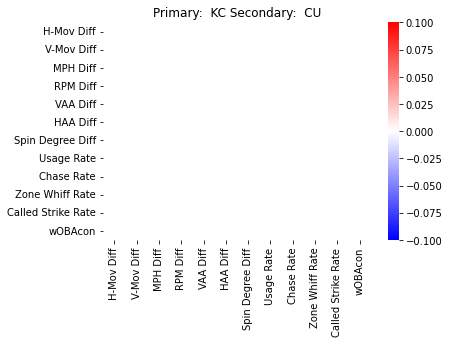

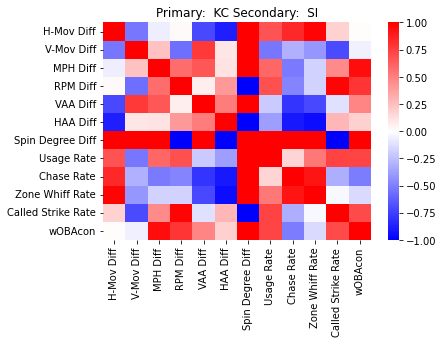

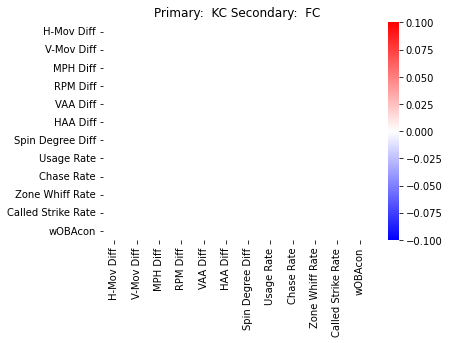

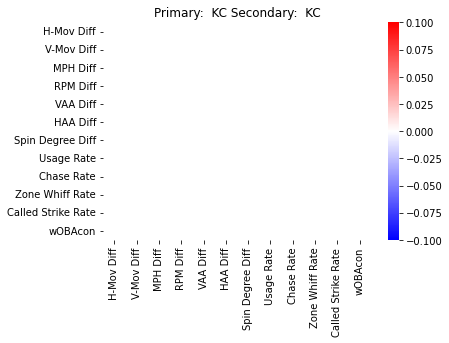

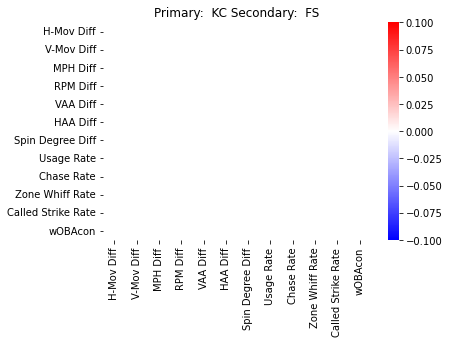

In [369]:
import matplotlib.pyplot as plt
import seaborn as sns

for prim in range(len(unique_prim)):
    for prop in range(len(unique_second)):
        first = unique_prim[prim]
        second = unique_second[prop]
        degromers = new_df.query(f'Primary == "{first}" and Secondary == "{second}"')

        #corrmap
        ax = plt.axes()
        dataplot = sns.heatmap(degromers.corr(), cmap="bwr",ax=ax)
        ax.set_title(f'Primary: {first} Secondary: {second}')
        plt.show()